# `%sql` Extension vs `sqlite3` Library - Which one is faster in executing SQL query?
This Notebook will measure runtime to execute SQL queries using two (2) different methods:

<b>`%sql` Extension</b>
<br>versus<br>
<b>`sqlite3` Library</b>

This Notebook is made possible thanks to the Kaggle.com Notebook entry <b>Getting Started</b> by Anna Wolak. [Check out the Notebook here!](https://www.kaggle.com/annawolak/getting-started-1)

Created by: Muhammad Azammuddin bin Suratem (`@azamsuratem` on GitHub)

## Introduction - `%timeit` Magic function
We can measure the runtime for any Python codes using the IPython Magic function `%timeit`.

- `%timeit` with only single `%` for measuring runtime of only a single (1) line of Python codes, while
- `%%timeit` with double `%%` for measuring runtime of two or more lines of Python codes.

By default, this Magic function runs the code seven (7) times. In each time (or run), Python will optimize the best iterations i.e. total number of loops to get the best runtime results.

Let's take a simple example of validating a variable:

In [1]:
x = 2

%timeit x == 2
%timeit x is 2

47.5 ns ± 6.14 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


<magic-timeit-stmt>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<magic-timeit>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?


44.4 ns ± 4.8 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


This Magic function can be tweaked to your own preference. Let's say I wanna measure the runtime in 5 runs with 1000 loops each.

Here, we will initialize the number of loops with `-n 1000` and the number of runs with `-r 5`:

In [2]:
x = 2

%timeit -n 1000 -r 5 x == 2
%timeit -n 1000 -r 5 x is 2

149 ns ± 0.642 ns per loop (mean ± std. dev. of 5 runs, 1000 loops each)
118 ns ± 1.88 ns per loop (mean ± std. dev. of 5 runs, 1000 loops each)


<magic-timeit-stmt>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<magic-timeit>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?


From both tests above, we can see that the <u>second method using</u> `x is 2` runs <b>faster than</b> the <u>first method using</u> `x == 2`.

You can learn more about how to use this `%timeit` Magic function in the online documentation here: [`%timeit` IPython documentation](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit)

## Importing Libraries

For this Notebook, the following libraries will be used to carry out the runtime tests. Also, the SQL Extension in IPython will be loaded here via IPython Magic function `%sql`, and connecting it with the database file `database.sqlite`.

In [3]:
# Importing Pandas and SQLite3 to extract data from database.sqlite query file into a dataframe
import pandas as pd
from sqlite3 import connect as ConnectDB

# Import Matplotlib and Seaborn to visualize runtime differences
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default')

import seaborn as sns

# To ignore any warnings
import warnings
warnings.filterwarnings("ignore")

# Import os library to get file directory for the database.sqlite file
import os
main_path = os.getcwd()
file_path = main_path + "\\database.sqlite"

# Load the SQL Extension via IPython Magic Function "%sql" and direct it towards the database.sqlite file 
%load_ext sql
%sql sqlite:///database.sqlite

After loading the `%sql` Extension, the method of using it for executing SQL queries are a bit same with the `%timeit` Magic function explained before.

You can learn more about how to use this `%sql` Extension in the online documentation here: [`%sql` IPython documentation](https://pypi.org/project/ipython-sql/)

## Simple Preparations

Before carrying out the runtime tests, I need to do some preparations including getting know the column names and total rows of data stored in the database file `database.sqlite`

In [4]:
# To know the Table structure i.e. columns names in the database.sqlite query file 
%sql SELECT sql FROM sqlite_master WHERE type='table'

 * sqlite:///database.sqlite
Done.


sql
"CREATE TABLE sampledata15 ( sample_pk int, state text(2), year text(2), month text(2), day text(2), site text(4), commod text(2), source_id text(1), variety text(20), origin text(2), country text(3), disttype text(1), commtype text(2), claim text(2), quantity int, growst text(2), packst text(2), distst text(2))"
"CREATE TABLE resultsdata15 ( sample_pk int, commod text(2), commtype text(2), lab text(3), pestcode text(3), testclass text(1), concen double, lod double, conunit text(1), confmethod text(2), confmethod2 text(2), annotate text(2), quantitate text(2), mean text(2), extract text(3), determin text(2))"


In [5]:
# connecting to the SQLite DB and extract the data from DB Tables into Pandas DataFrame
con = ConnectDB(file_path)
samples = pd.read_sql_query("SELECT * FROM sampledata15", con)
results = pd.read_sql_query("SELECT * FROM resultsdata15", con)
con.close()

# showing the total amount of extracted data by total rows of data in the table
print("Total number of data extracted from sampledata15:", len(samples))
print("------------------------------------------------------------")
print("Total number of data extracted from resultsdata15:", len(results))

Total number of data extracted from sampledata15: 10187
------------------------------------------------------------
Total number of data extracted from resultsdata15: 2333911


About ten thousand rows of data in the Table `sampledata15` and more than 2.3 million rows of data in the Table `resultsdata15`.

For sure, any runtime tests involving the Table `resultsdata15` will take quite a long time compared to Table `sampledata15`.
<br>To simplify this runtime tests, we will initialize the number of loops and runs separately for each Table, as follows:

<b>Table</b> `sampledata15`<b>:</b> 5 runs with 10 loops each, `-n 10 -r 5`
<br>
<b>Table</b> `resultsdata15`<b>:</b> 5 runs with only 1 loop each, `-n 1 -r 5`

We will use the `sampledata15` Table first for several runtime tests.

### Test #1: Simplest SQL Query - `SELECT * FROM Table_Name`

Let's measure the runtime for the most simple SQL query: `SELECT * FROM sampledata15`

This query will give the following output in terms of Pandas commands:

In [6]:
samples

,sample_pk,state,year,month,day,site,commod,source_id,variety,origin,country,disttype,commtype,claim,quantity,growst,packst,distst
0,1,CA,15,01,20,0010,AP,,Fuji,1,,H,FR,NC,12,,,WA\r\n
1,2,CA,15,01,20,0038,AP,,Red Delicious,1,,T,FR,NC,12,,WA,WA\r\n
2,3,CA,15,01,20,0043,AP,,Red Delicious,1,,T,FR,NC,,,WA,WA\r\n
3,4,CA,15,01,20,0114,AP,,Granny Smith,1,,H,FR,NC,17,,WA,WA\r\n
4,5,CA,15,01,20,0149,AP,,Fuji,1,,D,FR,PO,10,,,CA\r\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10182,10183,WA,15,05,11,0033,WM,,N/A,2,595,D,FR,NC,,,,AZ\r\n
10183,10184,WA,15,06,08,0011,WM,,Seedless,2,595,D,FR,NC,,,AZ,CA\r\n
10184,10185,WA,15,06,08,0023,WM,,Red Seedless,2,595,D,FR,NC,,,,CA\r\n
10185,10186,WA,15,06,08,0030,WM,,Red Seedless,1,,D,FR,NC,,,,CA\r\n


Measuring the runtime for `%sql` Extension...

In [7]:
%%timeit -n 10 -r 5
%sql SELECT * FROM sampledata15

 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///databas

Measuring the runtime for SQLite3 DB connection...

In [8]:
%%timeit -n 10 -r 5
pd.read_sql_query("SELECT * FROM sampledata15", ConnectDB(file_path))
ConnectDB(file_path).close()

90.9 ms ± 3.17 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


And now, let's see the comparison between these two methods:

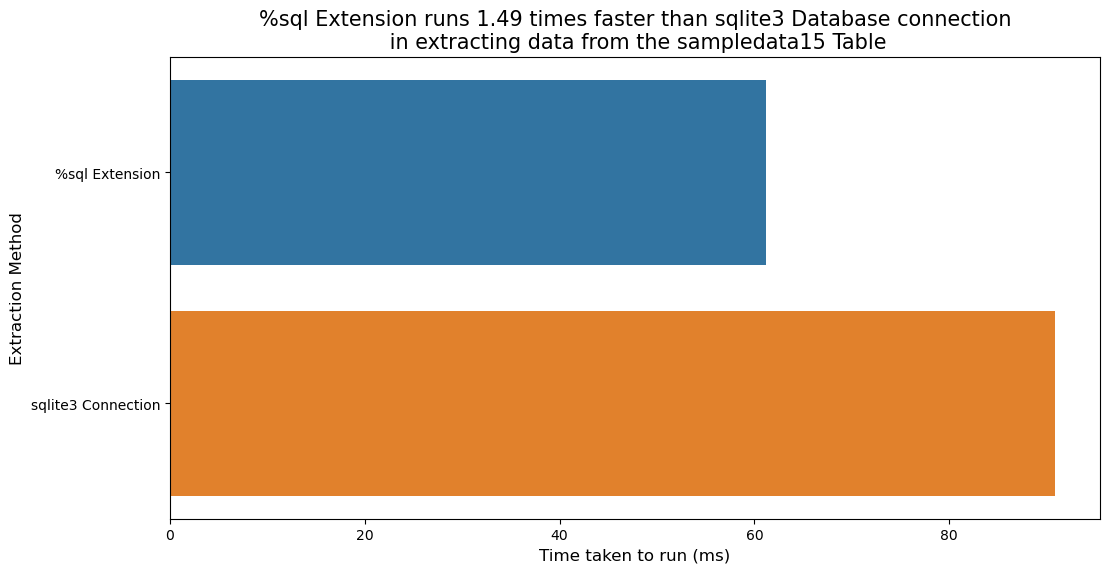

In [9]:
x1 = [61.2,90.9]
y1 = ["%sql Extension","sqlite3 Connection"]

plt.figure(figsize=(12,6))
sns.barplot(y=y1, x=x1)
plt.xlabel("Time taken to run (ms)", fontsize=12)
plt.ylabel("Extraction Method", fontsize=12)
plt.title(f"%sql Extension runs {round((x1[1]/x1[0]),2)} times faster than sqlite3 Database connection\
\n in extracting data from the sampledata15 Table", fontsize=15)
plt.show()

### Test #2: Extracting first 10 rows of the Table

How about measuring the runtime to extract the first 10 rows from the Table?

Here, the SQL query before is extended with `LIMIT 10` which will give the following output in terms of Pandas commands:

In [10]:
samples.head(10)

,sample_pk,state,year,month,day,site,commod,source_id,variety,origin,country,disttype,commtype,claim,quantity,growst,packst,distst
0,1,CA,15,01,20,0010,AP,,Fuji,1,,H,FR,NC,12,,,WA\r\n
1,2,CA,15,01,20,0038,AP,,Red Delicious,1,,T,FR,NC,12,,WA,WA\r\n
2,3,CA,15,01,20,0043,AP,,Red Delicious,1,,T,FR,NC,,,WA,WA\r\n
3,4,CA,15,01,20,0114,AP,,Granny Smith,1,,H,FR,NC,17,,WA,WA\r\n
4,5,CA,15,01,20,0149,AP,,Fuji,1,,D,FR,PO,10,,,CA\r\n
5,6,CA,15,01,20,0150,AP,,Red Delicious,1,,D,FR,NC,15,,,WA\r\n
6,7,CA,15,01,20,0152,AP,,N/A,1,,D,FR,NC,10,,,WA\r\n
7,8,CA,15,01,20,0277,AP,,Red Delicious,1,,H,FR,NC,10,,,WA\r\n
8,9,CA,15,01,20,0449,AP,,Red Delicious,1,,R,FR,NC,17,,,WA\r\n
9,10,CA,15,01,20,0540,AP,,Gala,1,,R,FR,PO,15,,,WA\r\n


Measuring the runtime for `%sql` Extension...

In [11]:
%%timeit -n 10 -r 5
%sql SELECT * FROM sampledata15 LIMIT 10

 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///databas

Measuring the runtime for SQLite3 DB connection...

In [12]:
%%timeit -n 10 -r 5
pd.read_sql_query("SELECT * FROM sampledata15 LIMIT 10", ConnectDB(file_path))
ConnectDB(file_path).close()

3.22 ms ± 746 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


And now, let's see the comparison between these two methods:

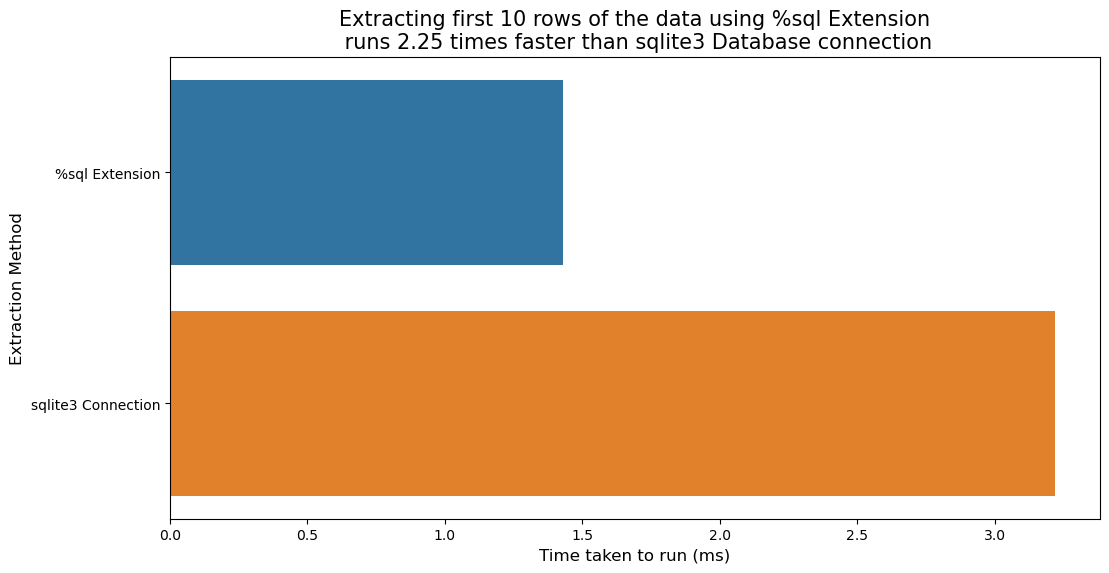

In [13]:
x2 = [1.43,3.22]
y2 = ["%sql Extension","sqlite3 Connection"]

plt.figure(figsize=(12,6))
sns.barplot(y=y2, x=x2)
plt.xlabel("Time taken to run (ms)", fontsize=12)
plt.ylabel("Extraction Method", fontsize=12)
plt.title(f"Extracting first 10 rows of the data using %sql Extension\n runs \
{round((x2[1]/x2[0]),2)} times faster than sqlite3 Database connection", fontsize=15)
plt.show()

### Test #3: Extracting first column of the Table

How about measuring the runtime to extract the first column of the data?

Here, the SQL query is altered by substituting `*` with `sample_pk` which will give the following output in terms of Pandas commands:

In [14]:
samples["sample_pk"].to_frame()

,sample_pk
0,1
1,2
2,3
3,4
4,5
...,...
10182,10183
10183,10184
10184,10185
10185,10186


Measuring the runtime for `%sql` Extension...

In [15]:
%%timeit -n 10 -r 5
%sql SELECT sample_pk FROM sampledata15

 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///databas

Measuring the runtime for SQLite3 DB connection...

In [16]:
%%timeit -n 10 -r 5
pd.read_sql_query("SELECT sample_pk FROM sampledata15", ConnectDB(file_path))
ConnectDB(file_path).close()

10.7 ms ± 631 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


And now, let's see the comparison between these two methods:

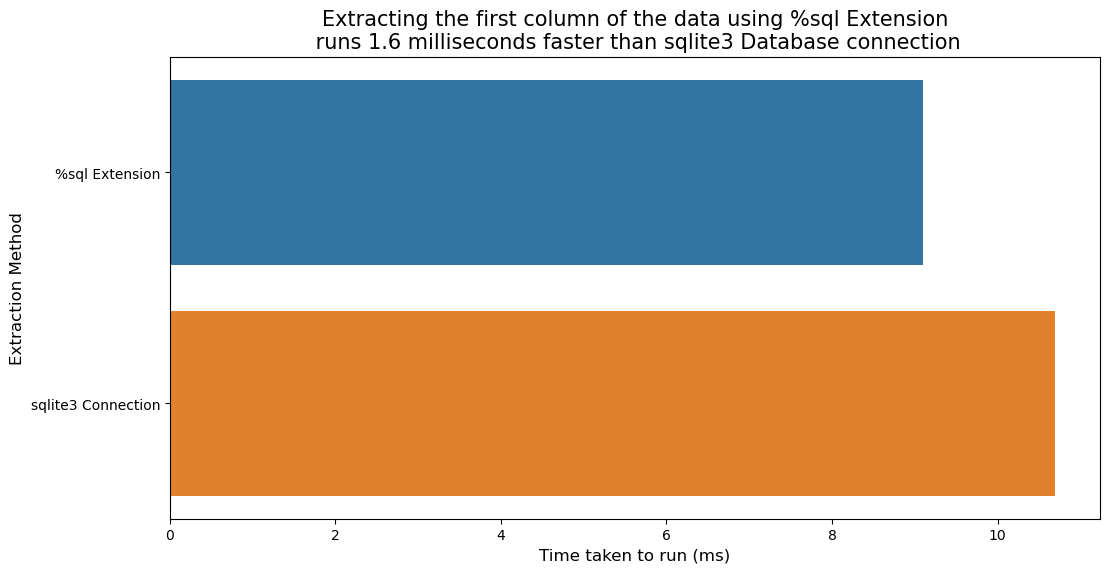

In [17]:
x3 = [9.1,10.7]
y3 = ["%sql Extension","sqlite3 Connection"]

plt.figure(figsize=(12,6))
sns.barplot(y=y3, x=x3)
plt.xlabel("Time taken to run (ms)", fontsize=12)
plt.ylabel("Extraction Method", fontsize=12)
plt.title(f"Extracting the first column of the data using %sql Extension\n runs \
{round((x3[1]-x3[0]),2)} milliseconds faster than sqlite3 Database connection", fontsize=15)
plt.show()

### Test #4: Extracting common values from a specific column in the Table

How about measuring the runtime to extract the common values in a column?

Here, the SQL query is altered by substituting `*` with `DISTINCT state` which will give the following output in terms of Pandas commands:

In [18]:
list(samples["state"].unique())

['CA', 'CO', 'FL', 'MD', 'MI', 'NY', 'OH', 'TX', 'WA', 'NC']

Measuring the runtime for `%sql` Extension...

In [19]:
%%timeit -n 10 -r 5
%sql SELECT DISTINCT state FROM sampledata15

 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///databas

Measuring the runtime for SQLite3 DB connection...

In [20]:
%%timeit -n 10 -r 5
pd.read_sql_query("SELECT DISTINCT state FROM sampledata15", ConnectDB(file_path))
ConnectDB(file_path).close()

3.98 ms ± 497 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


And now, let's see the comparison between these two methods:

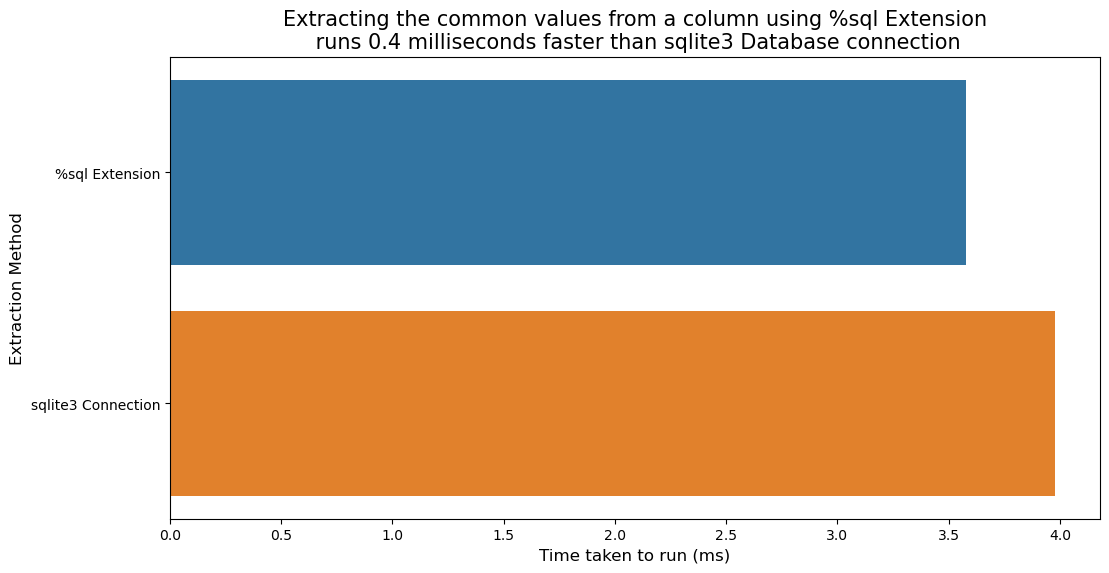

In [22]:
x4 = [3.58,3.98]
y4 = ["%sql Extension","sqlite3 Connection"]

plt.figure(figsize=(12,6))
sns.barplot(y=y4, x=x4)
plt.xlabel("Time taken to run (ms)", fontsize=12)
plt.ylabel("Extraction Method", fontsize=12)
plt.title(f"Extracting the common values from a column using %sql Extension\n runs \
{round((x4[1]-x4[0]),2)} milliseconds faster than sqlite3 Database connection", fontsize=15)
plt.show()

Now, let's use the `resultsdata15` Table for the rest runtime tests. But first, let's see the overview of the `resultsdata15` data, which has been extracted into the Pandas DataFrame `results` before.

In [23]:
# overview of the extracted resultsdata15 table which is stored in the results dataframe
results

,sample_pk,commod,commtype,lab,pestcode,testclass,concen,lod,conunit,confmethod,confmethod2,annotate,quantitate,mean,extract,determin
0,2,AP,FR,WA1,382,E,,0.0150,M,,,,,ND,805,35\r\n
1,2,AP,FR,WA1,387,A,,0.0050,M,,,,,ND,805,35\r\n
2,2,AP,FR,WA1,388,A,,0.0050,M,,,,,ND,805,35\r\n
3,2,AP,FR,WA1,512,E,,0.0030,M,,,,,ND,805,52\r\n
4,2,AP,FR,WA1,529,A,,0.0100,M,,,,,ND,805,35\r\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333906,10187,WM,FR,WA1,B78,L,,0.0100,M,,,,,ND,805,52\r\n
2333907,10187,WM,FR,WA1,B79,F,,0.0015,M,,,,,ND,805,52\r\n
2333908,10187,WM,FR,WA1,B80,A,,0.0015,M,,,,,ND,805,52\r\n
2333909,10187,WM,FR,WA1,B84,F,,0.0050,M,,,,,ND,805,52\r\n


### Test #5: Extracting data with a specific column that is not empty

Let's measure the runtime to extract the data where a specific column is not empty.

Here, the SQL query is extended with `WHERE concen IS NOT NULL` which gives the same output as the following Pandas command:

In [24]:
results[results["concen"] != ""]

,sample_pk,commod,commtype,lab,pestcode,testclass,concen,lod,conunit,confmethod,confmethod2,annotate,quantitate,mean,extract,determin
98,2,AP,FR,WA1,AGW,I,0.031,0.010,M,LU,,,,O,805,52\r\n
118,2,AP,FR,WA1,B23,A,0.25,0.025,M,GT,,,,O,805,35\r\n
132,2,AP,FR,WA1,B68,A,0.006,0.001,M,LU,,,,O,805,52\r\n
162,3,AP,FR,WA1,125,F,2.0,0.002,M,GT,,,,O,805,35\r\n
174,3,AP,FR,WA1,157,B,0.049,0.002,M,LU,,,,O,805,52\r\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332676,10182,WM,FR,WA1,607,F,0.002,0.001,M,LU,,,,O,805,52\r\n
2332724,10182,WM,FR,WA1,967,A,0.021,0.003,M,LU,,,,O,805,52\r\n
2333166,10184,WM,FR,WA1,967,A,0.015,0.003,M,LU,,,,O,805,52\r\n
2333560,10186,WM,FR,WA1,607,F,0.001,0.001,M,LU,,,,O,805,52\r\n


Measuring the runtime for `%sql` Extension...

In [25]:
%%timeit -n 1 -r 5
%sql SELECT * FROM resultsdata15 WHERE concen IS NOT NULL

 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
11.5 s ± 58.1 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


Measuring the runtime for SQLite3 DB connection...

In [26]:
%%timeit -n 1 -r 5
pd.read_sql_query("SELECT * FROM resultsdata15 WHERE concen IS NOT NULL", ConnectDB(file_path))
ConnectDB(file_path).close()

16.9 s ± 558 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


And now, let's see the comparison between these two methods:

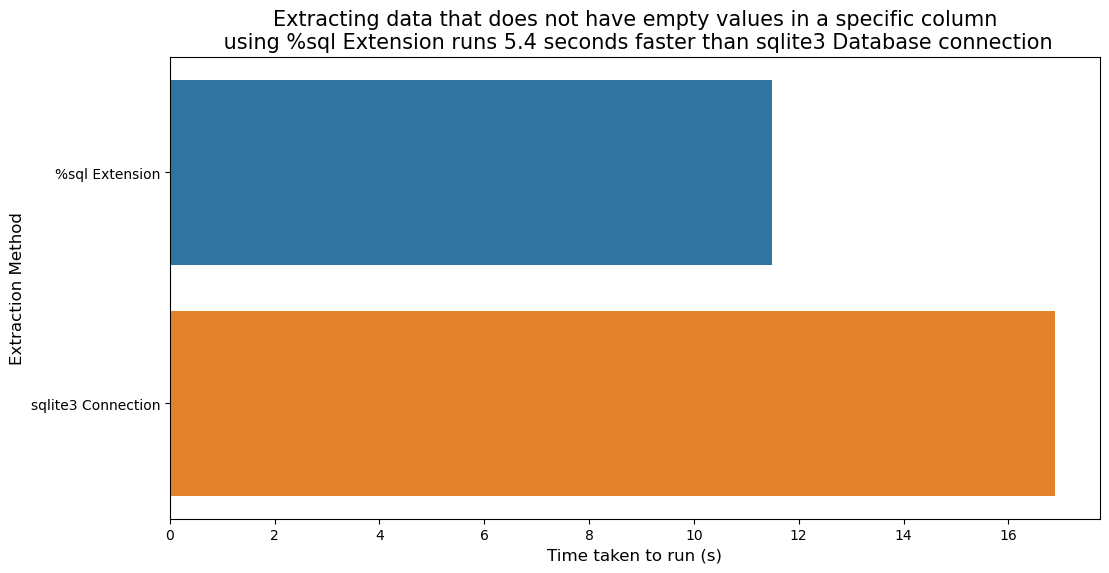

In [27]:
x5 = [11.5,16.9]
y5 = ["%sql Extension","sqlite3 Connection"]

plt.figure(figsize=(12,6))
sns.barplot(y=y5, x=x5)
plt.xlabel("Time taken to run (s)", fontsize=12)
plt.ylabel("Extraction Method", fontsize=12)
plt.title(f"Extracting data that does not have empty values in a specific column\n using %sql Extension runs \
{round((x5[1]-x5[0]),2)} seconds faster than sqlite3 Database connection", fontsize=15)
plt.show()

### Test #6: Sorting the data based on a specific column

How about the runtime for sorting the data based on the values in a specific column, either in ascending or descending order?

Here, the SQL query is further extended with `ORDER BY concen` for ascending order by default, or `ORDER BY concen DESC` for choosing descending order.

For this test, we will run the SQL query for <u>descending order of data sorting</u>. The equivalent Pandas command for sorting the data is by adding `.sort_values(by=["concen"], ascending=False)` after the previous Pandas command

In [28]:
results[results["concen"] != ""].sort_values(by=["concen"], ascending=False)

,sample_pk,commod,commtype,lab,pestcode,testclass,concen,lod,conunit,confmethod,confmethod2,annotate,quantitate,mean,extract,determin
1693194,7867,SP,FR,MI1,B48,F,16.0,0.0051,M,LU,,,,O,805,52\r\n
1632248,7571,PO,FR,NY1,114,E,11.0,0.0010,M,GT,,,,O,805,35\r\n
1462219,6613,PE,FR,OH1,083,I,10.0142,0.0020,M,GT,,,,O,805,35\r\n
1794253,8331,SP,FR,NY1,223,O,10.0,0.0012,M,GT,,,,O,805,35\r\n
1520527,7019,PO,FR,NY1,114,E,9.8,0.0010,M,GT,,,,O,805,35\r\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704906,7919,SP,FR,MI1,AFU,E,0.001,0.0010,M,LU,,V,P,O,805,64\r\n
88505,407,AP,FR,WA1,666,B,0.001,0.0010,M,LU,,,,O,805,52\r\n
1738580,8068,SP,FR,MI1,AFU,E,0.001,0.0010,M,LU,,V,P,O,805,64\r\n
19249,88,AP,FR,WA1,666,B,0.001,0.0010,M,LU,,,,O,805,52\r\n


Measuring the runtime for `%sql` Extension...

In [29]:
%%timeit -n 1 -r 5
%sql SELECT * FROM resultsdata15 WHERE concen IS NOT NULL ORDER BY concen DESC

 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
16.4 s ± 368 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


Measuring the runtime for SQLite3 DB connection...

In [30]:
%%timeit -n 1 -r 5
pd.read_sql_query("SELECT * FROM resultsdata15 WHERE concen IS NOT NULL ORDER BY concen DESC", ConnectDB(file_path))
ConnectDB(file_path).close()

21.8 s ± 747 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


And now, let's see the comparison between these two methods:

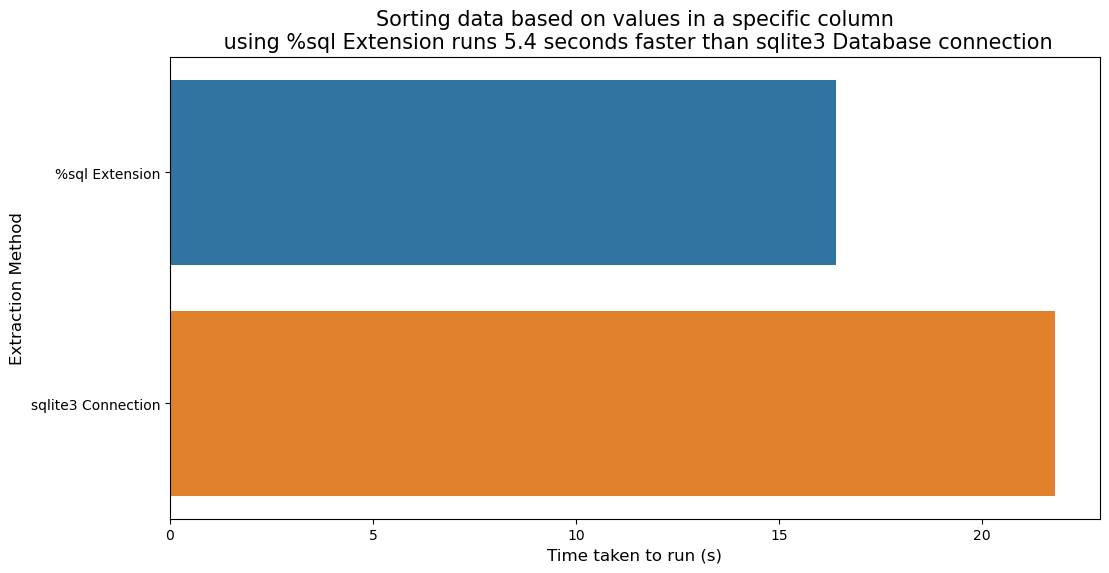

In [31]:
x6 = [16.4,21.8]
y6 = ["%sql Extension","sqlite3 Connection"]

plt.figure(figsize=(12,6))
sns.barplot(y=y6, x=x6)
plt.xlabel("Time taken to run (s)", fontsize=12)
plt.ylabel("Extraction Method", fontsize=12)
plt.title(f"Sorting data based on values in a specific column\n using %sql Extension runs \
{round((x6[1]-x6[0]),2)} seconds faster than sqlite3 Database connection", fontsize=15)
plt.show()

### Test #7: Combining two tables using INNER JOIN method

Let's see how long the runtime will be for executing SQL queries for combining these two Tables `sampledata15` and `resultsdata15` via <b>INNER JOIN</b> method.

Here, the equivalent Pandas command to combine these two tables are by merging the two dataframes, as follows:

In [32]:
results[["sample_pk","commod","commtype","lod"]]\
.merge(samples[["sample_pk","commod","commtype","state","claim"]],\
       how="inner", on=["sample_pk","commod","commtype"])

,sample_pk,commod,commtype,lod,state,claim
0,2,AP,FR,0.0150,CA,NC
1,2,AP,FR,0.0050,CA,NC
2,2,AP,FR,0.0050,CA,NC
3,2,AP,FR,0.0030,CA,NC
4,2,AP,FR,0.0100,CA,NC
...,...,...,...,...,...,...
2333906,10187,WM,FR,0.0100,WA,NC
2333907,10187,WM,FR,0.0015,WA,NC
2333908,10187,WM,FR,0.0015,WA,NC
2333909,10187,WM,FR,0.0050,WA,NC


Measuring the runtime for `%sql` Extension...

In [33]:
%%timeit -n 1 -r 5
%sql SELECT r.sample_pk, r.commod, r.commtype, r.lod, s.state, s.claim\
FROM resultsdata15 AS r INNER JOIN sampledata15 AS s\
ON r.sample_pk = s.sample_pk AND r.commod = s.commod AND r.commtype = s.commtype

 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
8.99 s ± 1 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [34]:
%%timeit -n 1 -r 5
pd.read_sql_query('''SELECT r.sample_pk, r.commod, r.commtype, r.lod, s.state, s.claim
FROM resultsdata15 AS r INNER JOIN sampledata15 AS s
ON r.sample_pk = s.sample_pk AND r.commod = s.commod AND r.commtype = s.commtype''', ConnectDB(file_path))
ConnectDB(file_path).close()

10.6 s ± 592 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


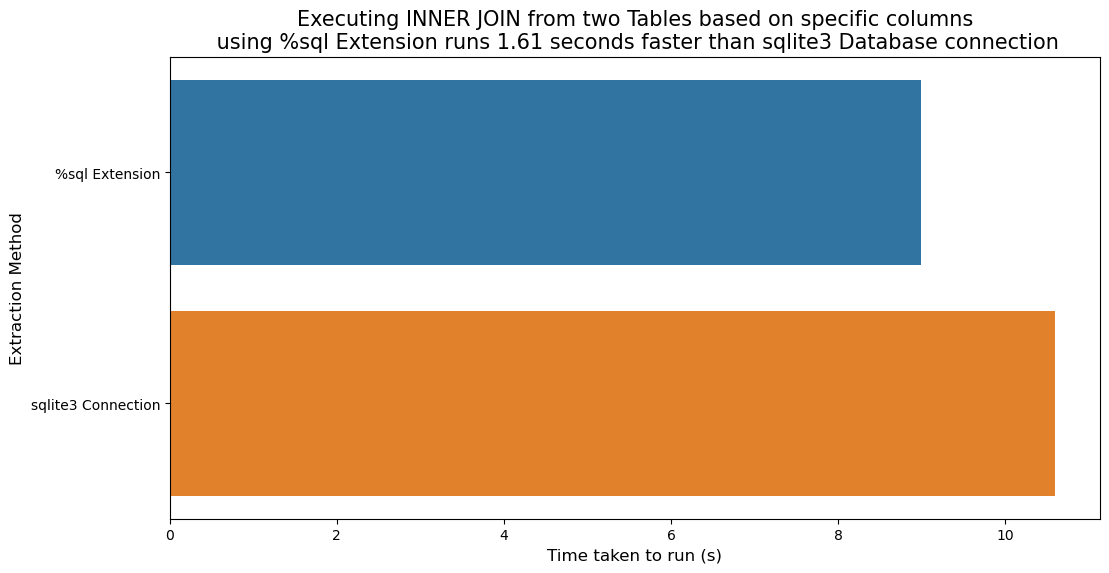

In [35]:
x7 = [8.99,10.6]
y7 = ["%sql Extension","sqlite3 Connection"]

plt.figure(figsize=(12,6))
sns.barplot(y=y7, x=x7)
plt.xlabel("Time taken to run (s)", fontsize=12)
plt.ylabel("Extraction Method", fontsize=12)
plt.title(f"Executing INNER JOIN from two Tables based on specific columns\n using %sql Extension runs \
{round((x7[1]-x7[0]),2)} seconds faster than sqlite3 Database connection", fontsize=15)
plt.show()

## Conclusion

From these <u>seven runtime tests</u>, we can clearly see that <u>using `%sql` Extension</u> to execute SQL queries <b>run much faster than</b> <u>using the `sqlite3` Library</u>.

## Extras - store the SQL query `INNER JOIN` in a DataFrame

Let's say that we want to store the SQL query on the <b>INNER JOIN</b> Tables in a DataFrame. Which one is faster?

Measuring the runtime for the `%sql` Extension...

In [36]:
%%timeit -n 1 -r 5

df = %sql SELECT r.sample_pk, r.commod, r.commtype, r.lod, s.state, s.claim\
FROM resultsdata15 AS r INNER JOIN sampledata15 AS s\
ON r.sample_pk = s.sample_pk AND r.commod = s.commod AND r.commtype = s.commtype

global df1
df1 = df.DataFrame()

 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
 * sqlite:///database.sqlite
Done.
10.6 s ± 94.9 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


Measuring the runtime for SQLite3 DB Connection...

In [37]:
%%timeit -n 1 -r 5
global df2
df2 = pd.read_sql_query('''SELECT r.sample_pk, r.commod, r.commtype, r.lod, s.state, s.claim
FROM resultsdata15 AS r INNER JOIN sampledata15 AS s
ON r.sample_pk = s.sample_pk AND r.commod = s.commod AND r.commtype = s.commtype''', ConnectDB(file_path))
ConnectDB(file_path).close()

9.77 s ± 137 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


And now, let's see the comparison between these two methods:

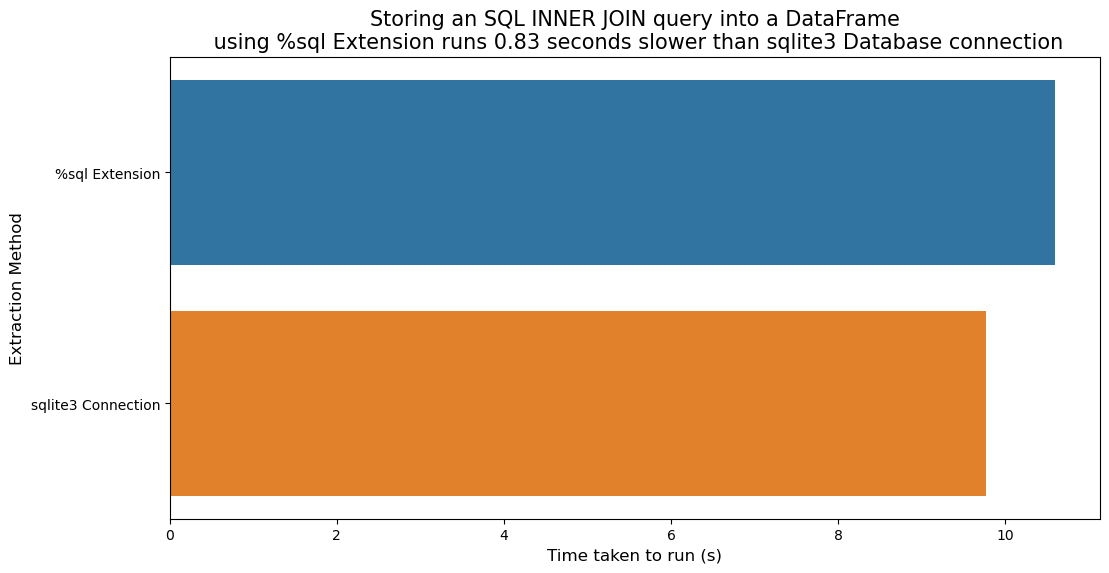

In [38]:
x8 = [10.6,9.77]
y8 = ["%sql Extension","sqlite3 Connection"]

plt.figure(figsize=(12,6))
sns.barplot(y=y8, x=x8)
plt.xlabel("Time taken to run (s)", fontsize=12)
plt.ylabel("Extraction Method", fontsize=12)
plt.title(f"Storing an SQL INNER JOIN query into a DataFrame\n using %sql Extension runs \
{round((x8[0]-x8[1]),2)} seconds slower than sqlite3 Database connection", fontsize=15)
plt.show()

Looks like when involving the step to store the executed query into a Pandas DataFrame, <u>`sqlite3` Library</u> <b>runs a bit faster</b> compared to <u>`%sql` Extension</u>.